# Screenplay Genre Classification

## Data Wrangling II

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#loading in data
data = pd.read_csv('data/txt_and_genres.csv', index_col = [0])

In [24]:
#only want data where genres exist
data = data[data.genre_amount != 0].copy()

In [25]:
data.head()

,title,text,genre,genre_amount
0,Domino,b'D O M I N O\r\n...,"['Thriller', 'Action', 'Crime']",3
1,Knocked Up,b'KNOCKED UP\r\n\r\nWritten by\r\n\r\nJudd Apa...,"['Comedy', 'Romance', 'Drama']",3
2,10 Things I Hate About You,b'TEN THINGS I HATE ABOUT YOU\r\n\r\nwritten b...,"['Comedy', 'Romance', 'Drama']",3
3,10000 B C,"b""10,000 B.C.\r\nby\r\nRoland Emmerich & Haral...","['Adventure', 'Action', 'Drama', 'Fantasy']",4
4,12 And Holding,b'12 AND HOLDING\r\n\r\nWritten by\r\n\r\nAnth...,['Drama'],1


### In this notebook, I continue to clean the data and then create the target classes using one hot enocoding.

In [26]:
#cleaning the lists of genres in the genre column
data['genre'] = data.genre.str.replace(']', '').str.strip('[').str.replace(',', '').str.split()

C:\Users\mikey\AppData\Local\Temp\ipykernel_21088\1628358882.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genre'] = data.genre.str.replace(']', '').str.strip('[').str.replace(',', '').str.split()


In [27]:
def lst_breaker(lst_of_genres):
    
    """
    This function takes a list of genres and returns a clean version. Specifically if the list contains Science and Fiction as two separate elements,
    then this function will delete both elements and append SciFi
    
    """

    lst = [] #intializes list to replace lst_of_genres
    
    for i in lst_of_genres:
        lst.append(i.strip("'")) #strips unnecessary " ' "
    
    if 'Science' in lst: #checks if 'Science' element is in list
        idx = lst.index('Science') #saves index
        lst.insert(idx, 'SciFi') #inserts SciFi in Science index position
        lst.remove('Science') 
        lst.remove('Fiction') #removes Science and Fiction from lst

    if 'TV' in lst:
        lst.remove('TV')
        lst.remove('Movie')

    return lst #returns clean, updated lst

In [28]:
#applying lst_breaker function
data['genre'] = data.genre.apply(lambda x: lst_breaker(x))

In [29]:
data.head()

,title,text,genre,genre_amount
0,Domino,b'D O M I N O\r\n...,"[Thriller, Action, Crime]",3
1,Knocked Up,b'KNOCKED UP\r\n\r\nWritten by\r\n\r\nJudd Apa...,"[Comedy, Romance, Drama]",3
2,10 Things I Hate About You,b'TEN THINGS I HATE ABOUT YOU\r\n\r\nwritten b...,"[Comedy, Romance, Drama]",3
3,10000 B C,"b""10,000 B.C.\r\nby\r\nRoland Emmerich & Haral...","[Adventure, Action, Drama, Fantasy]",4
4,12 And Holding,b'12 AND HOLDING\r\n\r\nWritten by\r\n\r\nAnth...,[Drama],1


### Now that the genre column is clean, I apply one hot enocoding to create targets for the multilabel classification model.

In [30]:
#creating a list of genres to one hot enocode

genre_lst = []

for i in data.genre:
    for x in i: #loops through genre column and appends genre names to list
        genre_lst.append(x)

genre_lst = list(set(genre_lst)) #creates a set to remove duplicates
genre_lst

['Crime',
 'Romance',
 'Animation',
 'SciFi',
 'Fantasy',
 'History',
 'Action',
 'Drama',
 'War',
 'Thriller',
 'Mystery',
 'Documentary',
 'Horror',
 'Family',
 'Adventure',
 'Music',
 'Comedy',
 'Western']

In [31]:
def genre_check(lst_of_genres, genre):
    
    """
    This function takes a list of genres and a genre name. If the genre name exists in the list
    the function returns 1. Else, returns 0. Ultimately, this is the function that one hot encodes our targets.
    
    """
    if genre in lst_of_genres:
        return 1
    else:
        return 0

In [32]:
#loops through genre_lst
for i in genre_lst:
    data[i] = data.genre.apply(lambda x: genre_check(x, i)) #creates a column for each genre with 1s and 0s

In [33]:
data.head()

,title,text,genre,genre_amount,Crime,Romance,Animation,SciFi,Fantasy,History,...,War,Thriller,Mystery,Documentary,Horror,Family,Adventure,Music,Comedy,Western
0,Domino,b'D O M I N O\r\n...,"[Thriller, Action, Crime]",3,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Knocked Up,b'KNOCKED UP\r\n\r\nWritten by\r\n\r\nJudd Apa...,"[Comedy, Romance, Drama]",3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10 Things I Hate About You,b'TEN THINGS I HATE ABOUT YOU\r\n\r\nwritten b...,"[Comedy, Romance, Drama]",3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10000 B C,"b""10,000 B.C.\r\nby\r\nRoland Emmerich & Haral...","[Adventure, Action, Drama, Fantasy]",4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,12 And Holding,b'12 AND HOLDING\r\n\r\nWritten by\r\n\r\nAnth...,[Drama],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#appending totals of each genre to list
sums = []
for i in genre_lst:
    total = data[i].sum()
    sums.append(total)


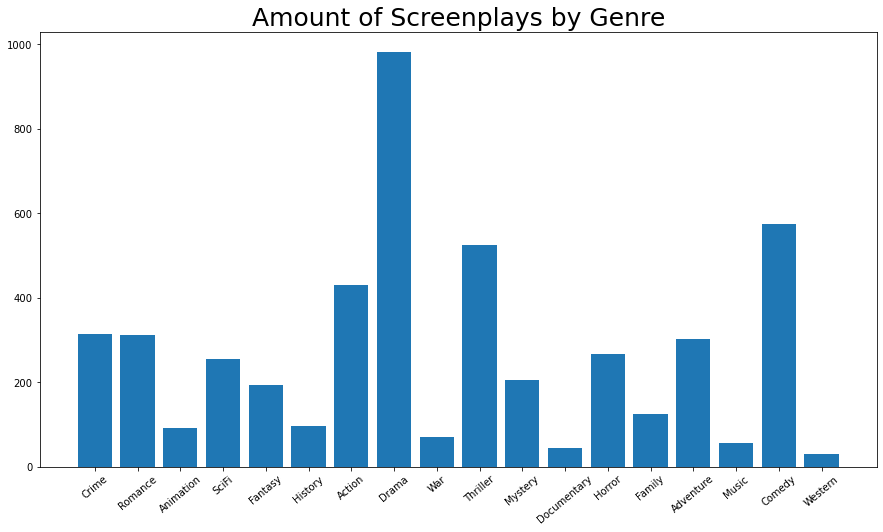

In [35]:
import matplotlib.pyplot as plt

#plotting class distribution

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(list(range(len(genre_lst))), sums)
ax.set_xticks(list(range(len(genre_lst))))
ax.set_xticklabels(genre_lst, rotation=40)
ax.set_title('Amount of Screenplays by Genre', size=25)

plt.show()

### Clearly there a class imbalances with Drama being the most common genre, while Documentary, Wester, and War are not as common. Although, keep in mind, most screenplays are different combinations of these genres. In the next EDA notebooks, I explore the different combinations of genres and amount of genres distribution.

In [ ]:
#saving data
data.to_csv('data/cleaned_data.csv')